In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [4]:
df.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

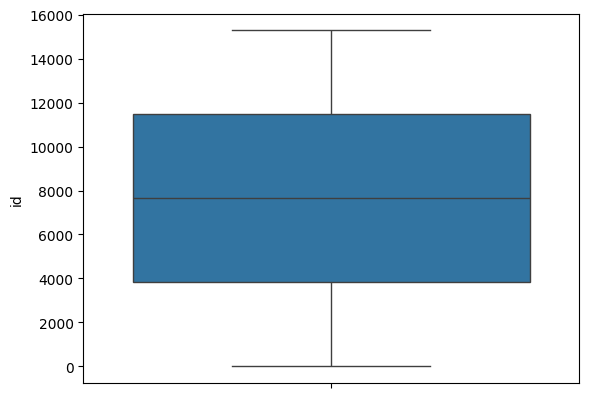

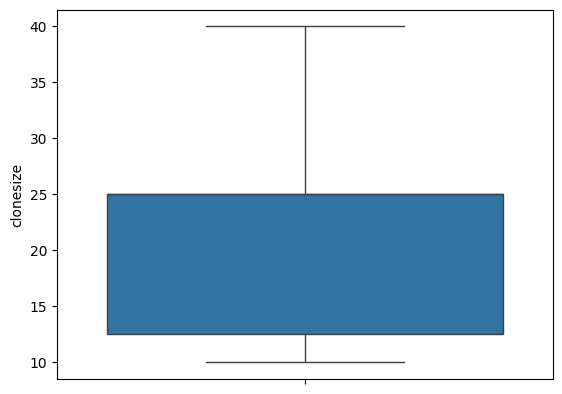

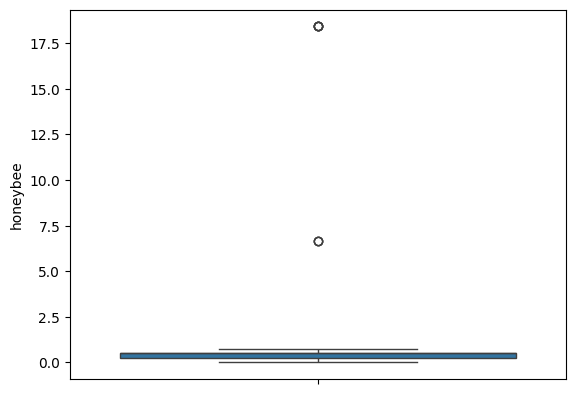

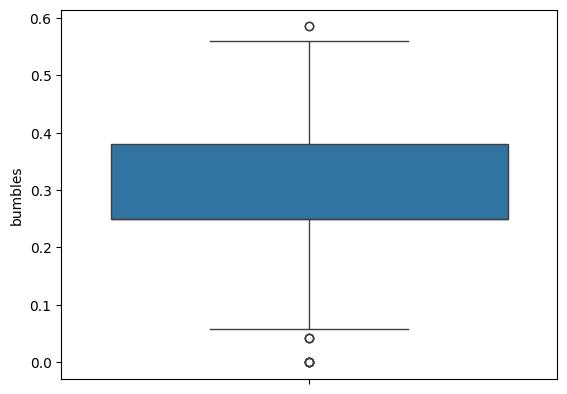

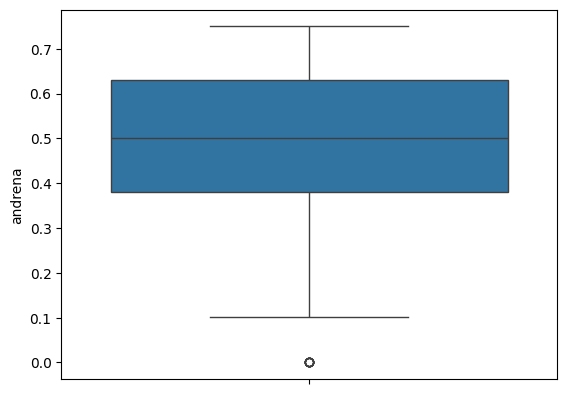

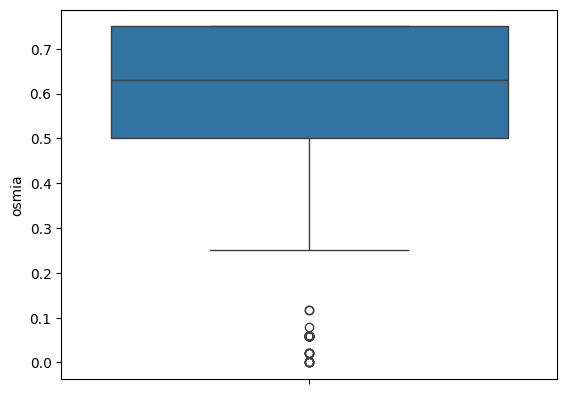

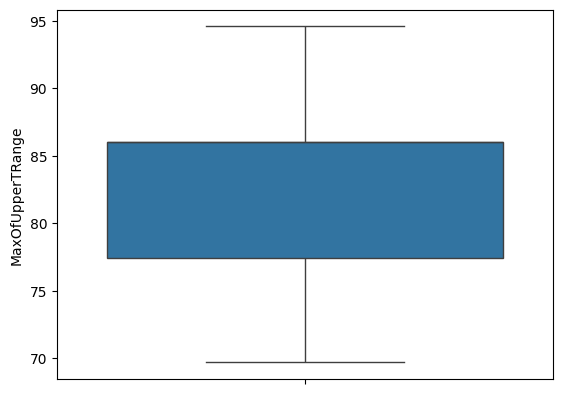

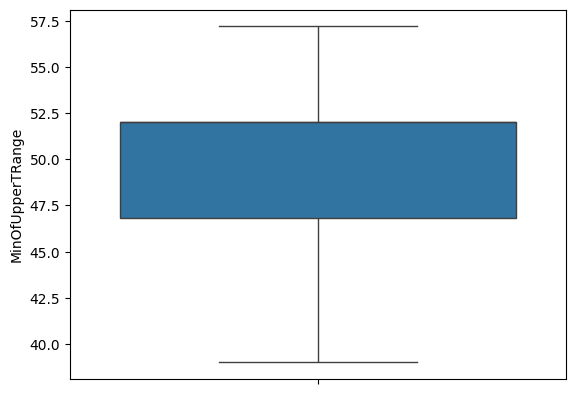

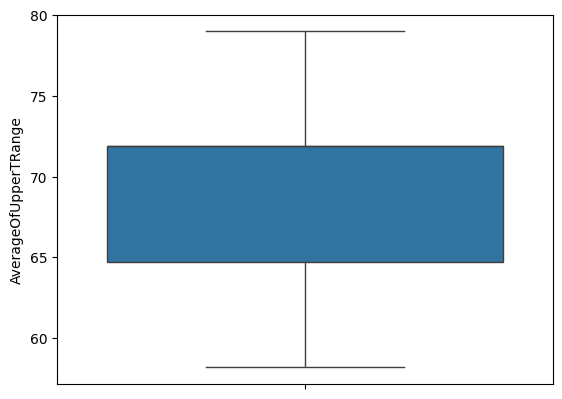

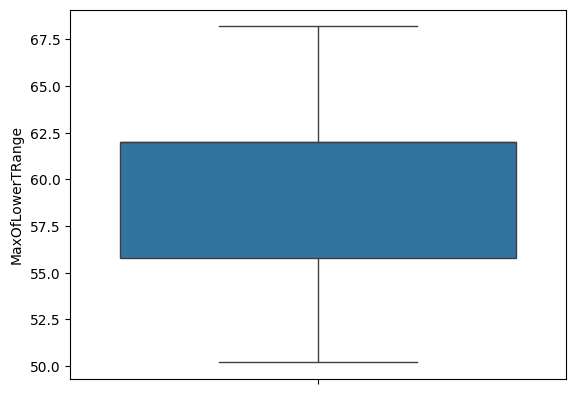

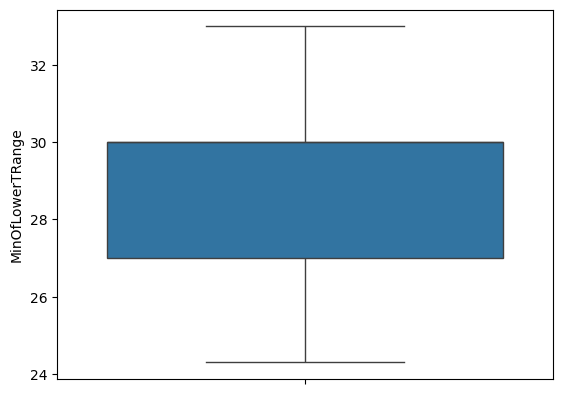

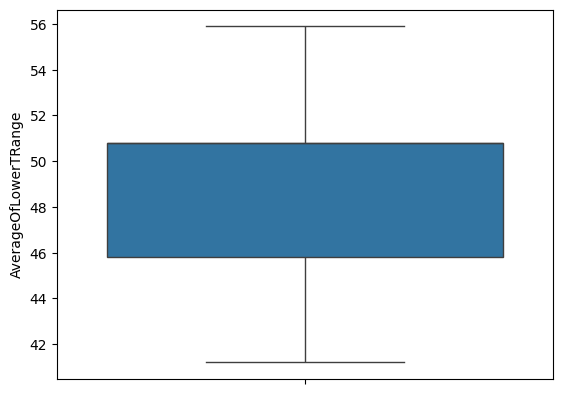

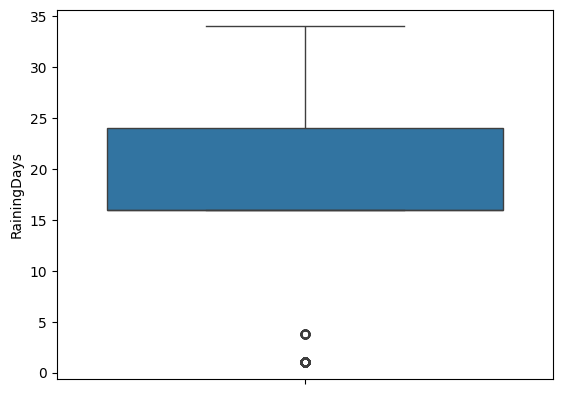

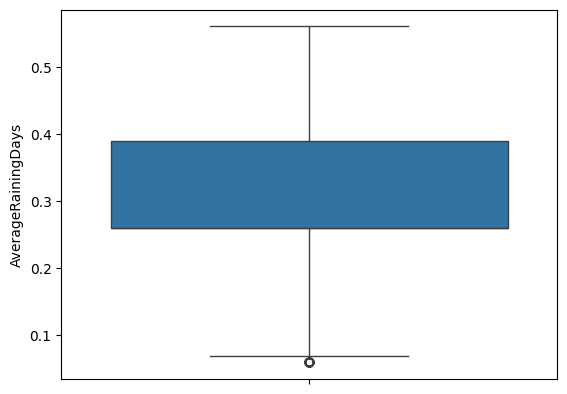

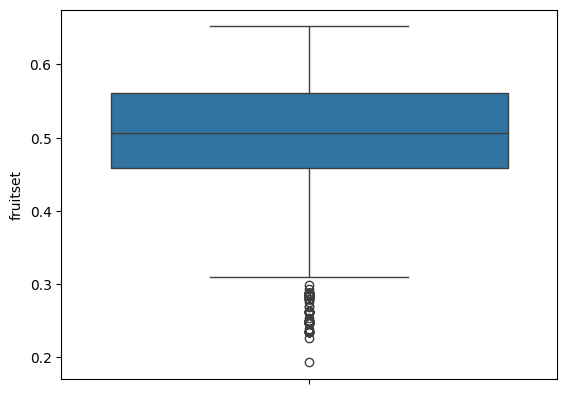

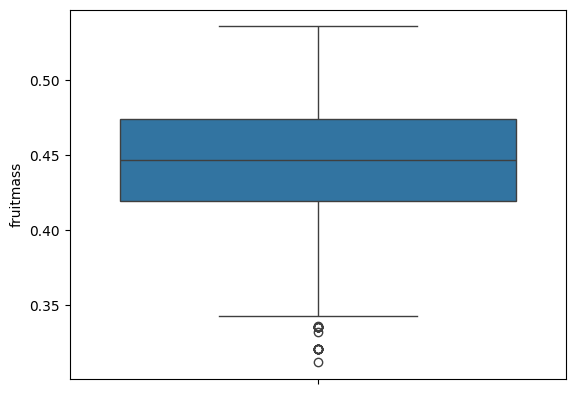

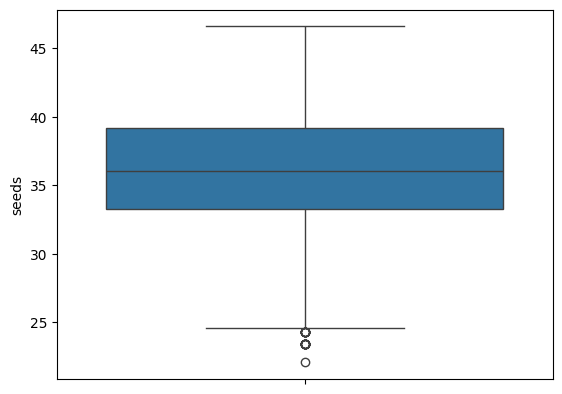

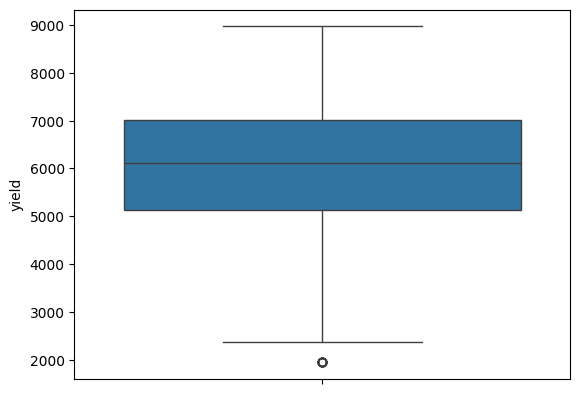

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
for cols in df.columns:
  sns.boxplot(df[cols])
  plt.show()

In [8]:
df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [9]:
X = df.drop(columns=['id','yield'],axis=1)
y = df[['yield']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
model = Sequential()

In [85]:
X.shape

(15289, 16)

In [86]:
model.add(Dense(16,activation='relu',input_shape=[16,]))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

In [87]:
model.compile(optimizer='adam',loss='mse')

In [88]:
early = EarlyStopping(monitor='val_loss',patience=5,mode='auto')

In [89]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[early],batch_size=32)

Epoch 1/100
321/321 [==============================] - 2s 4ms/step - loss: 12206830.0000 - val_loss: 2335293.7500
Epoch 2/100
321/321 [==============================] - 2s 5ms/step - loss: 3343060.2500 - val_loss: 2149387.0000
Epoch 3/100
321/321 [==============================] - 2s 6ms/step - loss: 2911741.2500 - val_loss: 1958791.8750
Epoch 4/100
321/321 [==============================] - 1s 4ms/step - loss: 2547688.0000 - val_loss: 1753281.0000
Epoch 5/100
321/321 [==============================] - 1s 3ms/step - loss: 2261299.5000 - val_loss: 2636980.7500
Epoch 6/100
321/321 [==============================] - 1s 3ms/step - loss: 2093097.3750 - val_loss: 2459027.2500
Epoch 7/100
321/321 [==============================] - 1s 3ms/step - loss: 1879959.6250 - val_loss: 1939671.2500
Epoch 8/100
321/321 [==============================] - 1s 3ms/step - loss: 1690416.0000 - val_loss: 1579684.6250
Epoch 9/100
321/321 [==============================] - 1s 3ms/step - loss: 1588489.0000 - val_l

In [90]:
losses = pd.DataFrame(model.history.history)

<Axes: >

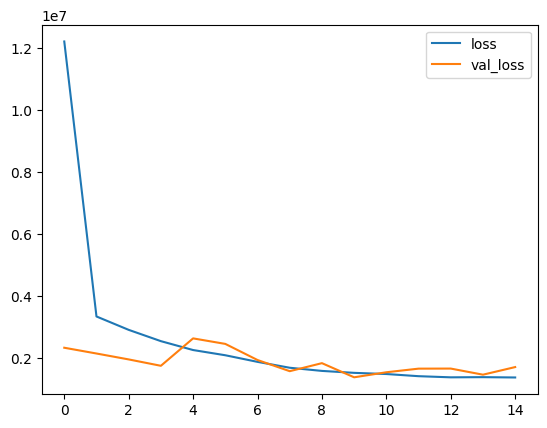

In [91]:
losses.plot()

In [92]:
test = pd.read_csv('test.csv')

In [93]:
ab = test.drop(columns='id')

In [94]:
preds = model.predict(ab)

319/319 [==============================] - 1s 2ms/step


In [30]:
test['yield'] = preds

In [31]:
test[['id','yield']].to_csv('submission.csv',index=False)

In [59]:
####Using ML Models

In [32]:
from xgboost import XGBRegressor

In [33]:
reg = XGBRegressor()

In [34]:
reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)

In [37]:
from sklearn.metrics import mean_absolute_error

In [39]:
print('Test MAE :: ',mean_absolute_error(y_test,test_pred))
print('Train MAE ::',mean_absolute_error(y_train,train_pred))

Test MAE ::  378.29213354736424
Train MAE :: 239.4807442221136


In [40]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {
   # 'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [48]:
gs = GridSearchCV(reg, param_grid, cv=5)

In [49]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'subsample': [0.8, 0.9, 1.0]})

In [53]:
reg2=gs.best_estimator_

In [54]:
test_pred = reg2.predict(X_test)
train_pred = reg2.predict(X_train)

In [55]:
print('Test MAE :: ',mean_absolute_error(y_test,test_pred))
print('Train MAE ::',mean_absolute_error(y_train,train_pred))

Test MAE ::  357.7510501919063
Train MAE :: 344.6094954887789


In [56]:
red2=reg2.predict(ab)

In [57]:
test['yield2'] = red2

In [58]:
test[['id','yield2']].to_csv('submission2.csv',index=False)